# Exercise 2 - CNNs, ResNets and LR-Scheduling

 * Deep Learning for Computer Vision – Winter Term 2024/25
 * Lecture by: Constantin Pape
 * Tutors: Anwai Archit, Oleg Bakumenko, Luca Freckmann, Marei Freitag, Sarah Muth, Sushmita Nair
 * Due date: **Tuesday, Nov 19, before 10:00**

### Time required to solve this exercise sheet
**As you will train a large number of models on this exercise sheet, model training will require an increased amount of time. So we recommend to start working on this sheet early.**

### Topics

In this exercise sheet, you will:
- work again with CIFAR-10
- implement a 1-layer CNN
- compare MLP and CNN
- vary architecture to improve model performance
- implement a ResNet for CIFAR-10
- learn about learning rate scheduling

*We are looking forward to seeing your solutions! Have fun!*

## IMPORTANT SUBMISSION INSTRUCTIONS

- **You need to answer all questions in written form!**
- When you've completed the exercise, download the notebook and rename it to `<surname1>_<surname2>_<surname3>.ipynb`
- Only submit the Jupyter Notebook (.ipynb file). No other file is required.
    - Upload it on `Stud.IP` -> `Deep Learning for Computer Vision` -> `Files` -> `Submission of Homework 2` -> `Tutorial X` (where, X is the tutorial you are assigned to).
- Make only one submission of the exercise per group.
- The deadline is strict.
- You have to present the exercise in the tutorials. We have a high ratio of students to tutors, so please decide which team member presents which part beforehand

Implementation:
- Do not change the cells which are marked as `DO NOT CHANGE`, similarly write your solution into the cells marked with TODOs for the questions asked.

### Imports

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau, ExponentialLR, StepLR
import torchvision
from torchvision import datasets, transforms, models
import fastprogress
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import time

## 1. Setup

You can use the functions to grab the data, split the sets, create the dataloaders and plot results, etc. given to you at exercise sheet 1.

It is good practice to store functions that are constantly needed again in a separate file such that instead of copy-pasting the cells into each exercise notebook, you can use the python file containing the functions and import it in the notebooks.

If you work with Kaggle (recommended) you have to mount the drive first and create a path to your python module or download the file from your drive.

#### **TODO**
Create a file named `setup.py` with all the necessary functions. Download this file to your Kaggle workspace and import it on this notebook.

Hint: Use the package `gdown` to download files from google drive.

```python
!conda install -y gdown
!gdown <file_id>
```

Here's how to find the `file_id`: 
If the file URL is https://drive.google.com/file/d/1066jDUxp8fXwdcNGj8h0CWJA0KNLpvKk/view?usp=share_link

where, `file_id` is 2732jDmxp7fXwddNGj8h0CWJA0WWLpvKk

In [3]:
# TODO: Download setup.py from google drive in Kaggle
!conda install -y gdown

Retrieving notices: ...working... done
Channels:
 - rapidsai
 - nvidia
 - nodefaults
 - conda-forge
 - defaults
 - pytorch
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - gdown


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-24.9.2               |  py310hff52083_0         895 KB  conda-forge
    filelock-3.16.1            |     pyhd8ed1ab_0          17 KB  conda-forge
    gdown-5.2.0                |     pyhd8ed1ab_0          21 KB  conda-forge
    openssl-3.4.0              |       hb9d3cd8_0         2.8 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.7 MB

The following NEW packages will be INSTALLED:

  filelock           conda-forge/noarch::filelock-3.16.1-pyhd8ed1ab_0 
  gdown              conda-forg

In [4]:
# !gdown 2732jDmxp7fXwddNGj8h0CWJA0WWLpvKk

In [5]:
# TODO: Import setup.py

#Accessing the file through dataset-method since the link for the file is not working. 
!python /kaggle/input/functions/setup.py

## 2. Load dataset, create dataloader, etc.

#### **TODO**
Call the functions of `setup.py` to instantiate the train-, test- and validation datasets along with their dataloaders.

In [6]:
#Copy the input funcitons into the working directory. 
!cp /kaggle/input/functions/setup.py /kaggle/working/

In [7]:
from setup import (
    get_device, 
    grab_data, 
    generate_train_val_data_split, 
    init_data_loaders
)

In [8]:
# TODO: Define device
device = get_device(cuda_preference = True)

In [9]:
data_dir = 'data'
batch_size = 256

# TODO: Grab data, generate split and initialize data loaders

trainset, testset = grab_data(data_dir, dataset = 'CIFAR10')
#Generate split for train and validation datasets
train_set_split, valset = generate_train_val_data_split(trainset, split_seed = 42, val_frac = 0.2)

#Initialize the data loaders for train, validation, and test datasets. 
trainloader, valloader, testloader = init_data_loaders(train_set_split, valset, testset, batch_size=1024)

# Verify the setup
print(f"Device: {device}")
print(f"Trainloader size: {len(trainloader)}")
print(f"Validation loader size: {len(valloader)}")
print(f"Testloader size: {len(testloader)}")

100%|██████████| 170498071/170498071 [00:06<00:00, 26790515.90it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified
Files already downloaded and verified
Device: cuda:0
Trainloader size: 40
Validation loader size: 10
Testloader size: 10


#### **TODO** 
Define the loss function. We use the cross entropy loss again.

In [10]:
# TODO: Define loss function
loss_fn = nn.CrossEntropyLoss()

## 3. Simple 1-layer CNN model

### **TODO**
- Define the model.

The first step to training a model is defining its architecture. 
Define a sequential model with following structure:
*   Convolutional layer with 32 filters, kernel size of 5*5 and stride of 1.
*   Max Pooling layer with kernel size of 2*2 and default stride.
*   ReLU Activation Layers.
*   Linear layer with output of 512.
*   ReLU Activation Layers.
*   A linear layer with output of 10.

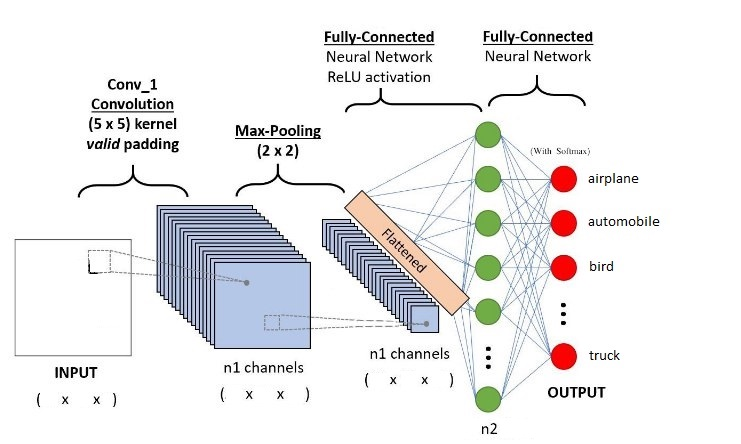

#### **Questions**

- What are the input dimensions?
- What are the dimensions of the feature maps?
- What are the dimensions after pooling?
- What is the size of each input (i.e value of `in_features`) to the first fully connected linear layer?
- What is the number of parameters for conv_1?

**Your answers here**

- For the CIFAR10 dataset images, the input dimensions are 32 * 32 * 3 (height * widths * channels).
- Filters: 32, Kernel Size: 5*5, Stride: 1. Thus, the output dimension of a convolution is:
  $$
      Output \; Size = \frac{Input \; Size - Kernel \; Size}{Stride} + 1 = \frac{32 - 5} {1} + 1 = 28
  $$
  Thus, the dimension after the convolution (feature map) is 28 x 28 x 32.

- The formula for the output dimension after pooling is:
  $$
      Output \; Size = \frac{Input \; Size}{Stride} = \frac{28}{2} = 14
  $$
  Thus, the dimension after pooling is 14 x 14 x 32.
- Before passing the feature maps to the first fully connected linear layer, the feature feature map is flattened into 1D vector (after max pooling as shown in the figure). Thus, input size (```in_features```) is 6272 i.e. (14 x 14 x 32).
- The number of parameters is given by:
  $$
      Parameters = (Kernel \; Size * Kernel \; Size * Input \; Channels + Bias) * Number \; of \; filters
  $$
  The Bias is 1 per filter. Thus, we conv_1 has 2432 i.e.(5 * 5 * 3 + 1)*32 parameters.

In [11]:
# TODO: Define model (1-layer CNN)
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        #Convolutional Layer:32 filters, kernel size 5*5,stride 1
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = 5, stride = 1) #CIFAR10 has RGB 3 input channels. 
        #Max Pooling Layer: Kernel size 2*2
        self.pool = nn.MaxPool2d(kernel_size = 2)
        #Fully connected (Linear) Layer 1: output of 512
        self.fc1 = nn.Linear(32 * 14 * 14, 512) #((32 - 5 + 1 = 28) / 2 = 14). 6272 flattened features are here.
        #Fully connected (Linear) Layer 2: output of 10 (number of classes)
        self.fc2 = nn.Linear(512, 10) #fc2 maps 512 features to the final of 10 output classes. 

    def forward(self, x):
        #Apply Convoutional Layer + ReLU
        x = F.relu(self.conv1(x))
        #Apply Max Pooling
        x = self.pool(x)
        #Flatten the output for the linear layer
        x = x.view(x.size(0), -1) #Flatten to [batch_size, features], reshaped to 1D vector using view. 
        #Apply Linear Layer 1 + ReLU
        x = F.relu(self.fc1(x))
        #Apply linear Layer 2
        x = self.fc2(x)
        return x

#Instantiate the model
model = SimpleCNN()

#Print the model architecture
print(model)


SimpleCNN(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=6272, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)


#### **TODO**

- Train the model for 10 epochs. Try lr=0.001 (can be changed to suit other design choices you make)
- Plot the results of accuracy and loss as you did in exercise sheet 1.

In [12]:
from setup import train, validate, plot, get_device

In [13]:
# TODO: Train and plot

learning_rate = 0.001
num_epochs = 10

#Initialize the model, optimizer, and loss function
device = get_device(cuda_preference = True)
model = SimpleCNN().to(device)
optimizer = optim.Adam(model.parameters(), lr = learning_rate)
loss_function = nn.CrossEntropyLoss()

#Lists to store results
train_losses, val_losses, train_accs, val_accs = [], [], [], []

#Train the model
for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")

    #Train for one epoch
    train_loss, train_acc = train(trainloader, optimizer, model, loss_function, device, master_bar=None)
    train_losses.append(train_loss)
    train_accs.append(train_acc)

    #Validate after each epoch
    val_loss, val_acc, _ = validate(valloader, model, loss_function, device, master_bar=None)
    val_losses.append(val_loss)
    val_accs.append(val_acc)

    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}")
    print(f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.4f}")


Epoch 1/10


Train Loss: 1.8124, Train Accuracy: 0.3620
Val Loss: 1.4943, Val Accuracy: 0.4760
Epoch 2/10


Train Loss: 1.3682, Train Accuracy: 0.5191
Val Loss: 1.3486, Val Accuracy: 0.5250
Epoch 3/10


Train Loss: 1.2229, Train Accuracy: 0.5693
Val Loss: 1.2588, Val Accuracy: 0.5581
Epoch 4/10


Train Loss: 1.1171, Train Accuracy: 0.6070
Val Loss: 1.1776, Val Accuracy: 0.5833
Epoch 5/10


Train Loss: 1.0382, Train Accuracy: 0.6383
Val Loss: 1.1208, Val Accuracy: 0.6048
Epoch 6/10


Train Loss: 0.9569, Train Accuracy: 0.6674
Val Loss: 1.0570, Val Accuracy: 0.6323
Epoch 7/10


Train Loss: 0.9076, Train Accuracy: 0.6877
Val Loss: 1.1410, Val Accuracy: 0.6017
Epoch 8/10


Train Loss: 0.8466, Train Accuracy: 0.7067
Val Loss: 1.1478, Val Accuracy: 0.5995
Epoch 9/10


Train Loss: 0.7945, Train Accuracy: 0.7247
Val Loss: 0.9981, Val Accuracy: 0.6557
Epoch 10/10


Train Loss: 0.7277, Train Accuracy: 0.7516
Val Loss: 1.0285, Val Accuracy: 0.6458


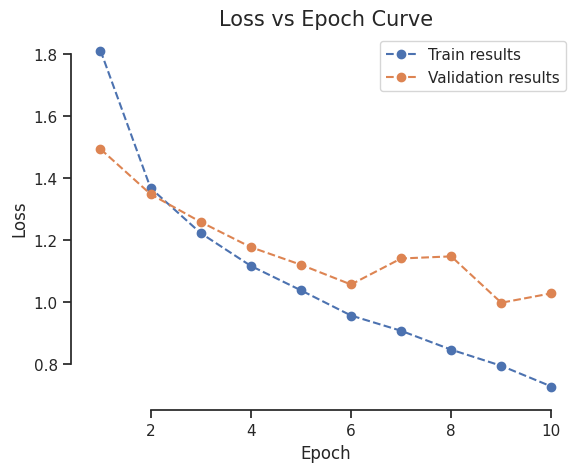

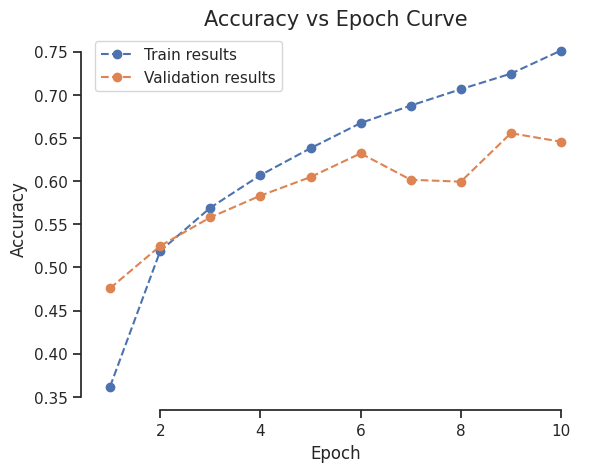

In [14]:
#Plot the results

#Plot training and validation loss
plot (
    title = "Loss vs Epoch Curve", 
    label = "Loss", 
    train_results = train_losses, 
    val_results = val_losses
)

#Plot training and validation accuracy
plot (
    title = "Accuracy vs Epoch Curve",
    label = "Accuracy", 
    train_results = train_accs, 
    val_results = val_accs
)


#### **TODO**
Compare results to the MLP models you trained in Exercise 1. What can you observe?

**Your answers here**

Comparing these results to the MLP models trained in Exercise 1, we can say that the validation accuracy using a single layered convolutional neural network has increased by almost 16%. During exercise 1, the best validation accuracy  for the MLP was almost 48%. However, we have our current maximum validation accuracy (using single layer CNN, learning rate = 0.001, number of epoch = 9) as 64.57%. 

**For your reference, below is the loss and accuracy plots of an MLP model trained in Exercise sheet 1:**

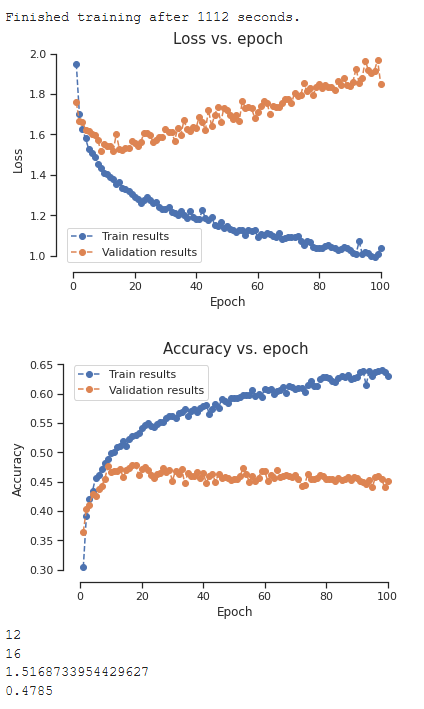

#### **TODO** 
Train longer (ca. 60 epochs), plot again.

Epoch 1/60


Train Loss: 0.6891, Train Accuracy: 0.7643
Val Loss: 1.0385, Val Accuracy: 0.6446
Epoch 2/60


Train Loss: 0.6389, Train Accuracy: 0.7834
Val Loss: 1.0043, Val Accuracy: 0.6597
Epoch 3/60


Train Loss: 0.5974, Train Accuracy: 0.7992
Val Loss: 1.0943, Val Accuracy: 0.6375
Epoch 4/60


Train Loss: 0.5716, Train Accuracy: 0.8074
Val Loss: 1.0369, Val Accuracy: 0.6584
Epoch 5/60


Train Loss: 0.5064, Train Accuracy: 0.8343
Val Loss: 1.0832, Val Accuracy: 0.6465
Epoch 6/60


Train Loss: 0.4665, Train Accuracy: 0.8479
Val Loss: 1.0527, Val Accuracy: 0.6609
Epoch 7/60


Train Loss: 0.4163, Train Accuracy: 0.8653
Val Loss: 1.1755, Val Accuracy: 0.6394
Epoch 8/60


Train Loss: 0.3928, Train Accuracy: 0.8736
Val Loss: 1.0987, Val Accuracy: 0.6608
Epoch 9/60


Train Loss: 0.3445, Train Accuracy: 0.8930
Val Loss: 1.1597, Val Accuracy: 0.6515
Epoch 10/60


Train Loss: 0.3124, Train Accuracy: 0.9015
Val Loss: 1.1507, Val Accuracy: 0.6607
Epoch 11/60


Train Loss: 0.2665, Train Accuracy: 0.9226
Val Loss: 1.1874, Val Accuracy: 0.6571
Epoch 12/60


Train Loss: 0.2511, Train Accuracy: 0.9267
Val Loss: 1.2305, Val Accuracy: 0.6574
Epoch 13/60


Train Loss: 0.2165, Train Accuracy: 0.9410
Val Loss: 1.2768, Val Accuracy: 0.6512
Epoch 14/60


Train Loss: 0.1840, Train Accuracy: 0.9538
Val Loss: 1.2719, Val Accuracy: 0.6642
Epoch 15/60


Train Loss: 0.1632, Train Accuracy: 0.9602
Val Loss: 1.4100, Val Accuracy: 0.6345
Epoch 16/60


Train Loss: 0.1536, Train Accuracy: 0.9612
Val Loss: 1.4110, Val Accuracy: 0.6414
Epoch 17/60


Train Loss: 0.1339, Train Accuracy: 0.9690
Val Loss: 1.3950, Val Accuracy: 0.6552
Epoch 18/60


Train Loss: 0.1141, Train Accuracy: 0.9748
Val Loss: 1.4908, Val Accuracy: 0.6470
Epoch 19/60


Train Loss: 0.0922, Train Accuracy: 0.9836
Val Loss: 1.5052, Val Accuracy: 0.6485
Epoch 20/60


Train Loss: 0.0843, Train Accuracy: 0.9841
Val Loss: 1.5086, Val Accuracy: 0.6560
Epoch 21/60


Train Loss: 0.0626, Train Accuracy: 0.9929
Val Loss: 1.5164, Val Accuracy: 0.6566
Epoch 22/60


Train Loss: 0.0515, Train Accuracy: 0.9951
Val Loss: 1.5559, Val Accuracy: 0.6613
Epoch 23/60


Train Loss: 0.0418, Train Accuracy: 0.9973
Val Loss: 1.5824, Val Accuracy: 0.6580
Epoch 24/60


Train Loss: 0.0349, Train Accuracy: 0.9981
Val Loss: 1.6119, Val Accuracy: 0.6633
Epoch 25/60


Train Loss: 0.0360, Train Accuracy: 0.9972
Val Loss: 1.6457, Val Accuracy: 0.6592
Epoch 26/60


Train Loss: 0.0261, Train Accuracy: 0.9990
Val Loss: 1.6580, Val Accuracy: 0.6610
Epoch 27/60


Train Loss: 0.0213, Train Accuracy: 0.9994
Val Loss: 1.6857, Val Accuracy: 0.6584
Epoch 28/60


Train Loss: 0.0187, Train Accuracy: 0.9996
Val Loss: 1.7235, Val Accuracy: 0.6562
Epoch 29/60


Train Loss: 0.0159, Train Accuracy: 0.9997
Val Loss: 1.7363, Val Accuracy: 0.6618
Epoch 30/60


Train Loss: 0.0142, Train Accuracy: 0.9998
Val Loss: 1.7625, Val Accuracy: 0.6589
Epoch 31/60


Train Loss: 0.0127, Train Accuracy: 0.9998
Val Loss: 1.7951, Val Accuracy: 0.6581
Epoch 32/60


Train Loss: 0.0118, Train Accuracy: 1.0000
Val Loss: 1.8033, Val Accuracy: 0.6599
Epoch 33/60


Train Loss: 0.0106, Train Accuracy: 1.0000
Val Loss: 1.8228, Val Accuracy: 0.6595
Epoch 34/60


Train Loss: 0.0093, Train Accuracy: 0.9999
Val Loss: 1.8520, Val Accuracy: 0.6587
Epoch 35/60


Train Loss: 0.0085, Train Accuracy: 1.0000
Val Loss: 1.8654, Val Accuracy: 0.6589
Epoch 36/60


Train Loss: 0.0083, Train Accuracy: 0.9999
Val Loss: 1.8832, Val Accuracy: 0.6592
Epoch 37/60


Train Loss: 0.0073, Train Accuracy: 0.9999
Val Loss: 1.9018, Val Accuracy: 0.6604
Epoch 38/60


Train Loss: 0.0068, Train Accuracy: 1.0000
Val Loss: 1.9244, Val Accuracy: 0.6603
Epoch 39/60


Train Loss: 0.0064, Train Accuracy: 1.0000
Val Loss: 1.9567, Val Accuracy: 0.6581
Epoch 40/60


Train Loss: 0.0062, Train Accuracy: 1.0000
Val Loss: 1.9675, Val Accuracy: 0.6597
Epoch 41/60


Train Loss: 0.0055, Train Accuracy: 1.0000
Val Loss: 1.9744, Val Accuracy: 0.6578
Epoch 42/60


Train Loss: 0.0050, Train Accuracy: 1.0000
Val Loss: 1.9872, Val Accuracy: 0.6602
Epoch 43/60


Train Loss: 0.0047, Train Accuracy: 1.0000
Val Loss: 2.0061, Val Accuracy: 0.6603
Epoch 44/60


Train Loss: 0.0044, Train Accuracy: 1.0000
Val Loss: 2.0235, Val Accuracy: 0.6604
Epoch 45/60


Train Loss: 0.0042, Train Accuracy: 1.0000
Val Loss: 2.0401, Val Accuracy: 0.6600
Epoch 46/60


Train Loss: 0.0039, Train Accuracy: 1.0000
Val Loss: 2.0440, Val Accuracy: 0.6591
Epoch 47/60


Train Loss: 0.0036, Train Accuracy: 1.0000
Val Loss: 2.0656, Val Accuracy: 0.6613
Epoch 48/60


Train Loss: 0.0034, Train Accuracy: 1.0000
Val Loss: 2.0834, Val Accuracy: 0.6588
Epoch 49/60


Train Loss: 0.0033, Train Accuracy: 1.0000
Val Loss: 2.0892, Val Accuracy: 0.6588
Epoch 50/60


Train Loss: 0.0031, Train Accuracy: 1.0000
Val Loss: 2.1091, Val Accuracy: 0.6602
Epoch 51/60


Train Loss: 0.0029, Train Accuracy: 1.0000
Val Loss: 2.1106, Val Accuracy: 0.6597
Epoch 52/60


Train Loss: 0.0028, Train Accuracy: 1.0000
Val Loss: 2.1363, Val Accuracy: 0.6597
Epoch 53/60


Train Loss: 0.0026, Train Accuracy: 1.0000
Val Loss: 2.1402, Val Accuracy: 0.6599
Epoch 54/60


Train Loss: 0.0025, Train Accuracy: 1.0000
Val Loss: 2.1567, Val Accuracy: 0.6597
Epoch 55/60


Train Loss: 0.0024, Train Accuracy: 1.0000
Val Loss: 2.1692, Val Accuracy: 0.6588
Epoch 56/60


Train Loss: 0.0022, Train Accuracy: 1.0000
Val Loss: 2.1795, Val Accuracy: 0.6584
Epoch 57/60


Train Loss: 0.0021, Train Accuracy: 1.0000
Val Loss: 2.1975, Val Accuracy: 0.6597
Epoch 58/60


Train Loss: 0.0020, Train Accuracy: 1.0000
Val Loss: 2.2048, Val Accuracy: 0.6590
Epoch 59/60


Train Loss: 0.0019, Train Accuracy: 1.0000
Val Loss: 2.2148, Val Accuracy: 0.6599
Epoch 60/60


Train Loss: 0.0018, Train Accuracy: 1.0000
Val Loss: 2.2211, Val Accuracy: 0.6600


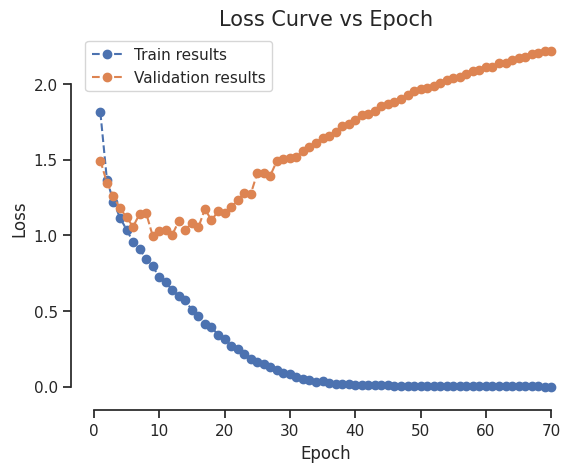

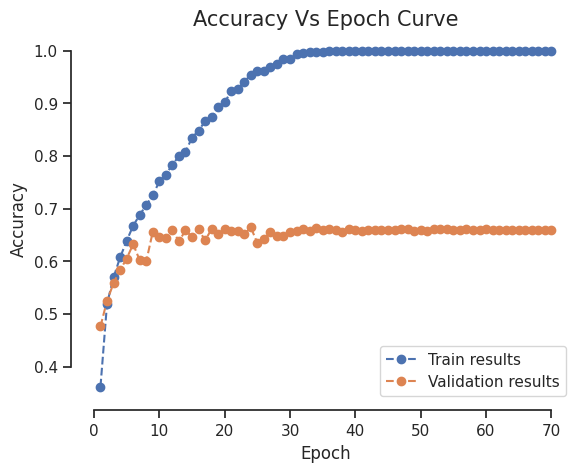

In [15]:
# TODO: Train and plot

num_epochs = 60

#Train the model
for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")

    #Train for one epoch
    train_loss, train_acc = train(trainloader, optimizer, model, loss_function, device, master_bar=None)
    train_losses.append(train_loss)
    train_accs.append(train_acc)

    #Validate after each epoch
    val_loss, val_acc, _ = validate(valloader, model, loss_function, device, master_bar=None)
    val_losses.append(val_loss)
    val_accs.append(val_acc)

    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}")
    print(f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.4f}")


# Plot results
plot("Loss Curve vs Epoch", "Loss", train_losses, val_losses)
plot("Accuracy Vs Epoch Curve", "Accuracy", train_accs, val_accs)

#### **Questions**
- Why is that not an optimal model?
- What could be improved?

**Your answers here**

- Running for longer period results in overfitting as the model tries to learn noise and decrease the validation accuracy.
- This can be improved by regularization or drop out. 

## 4. CNN model with more convolutional layers

#### **TODO**
Define the architecture using the following information:



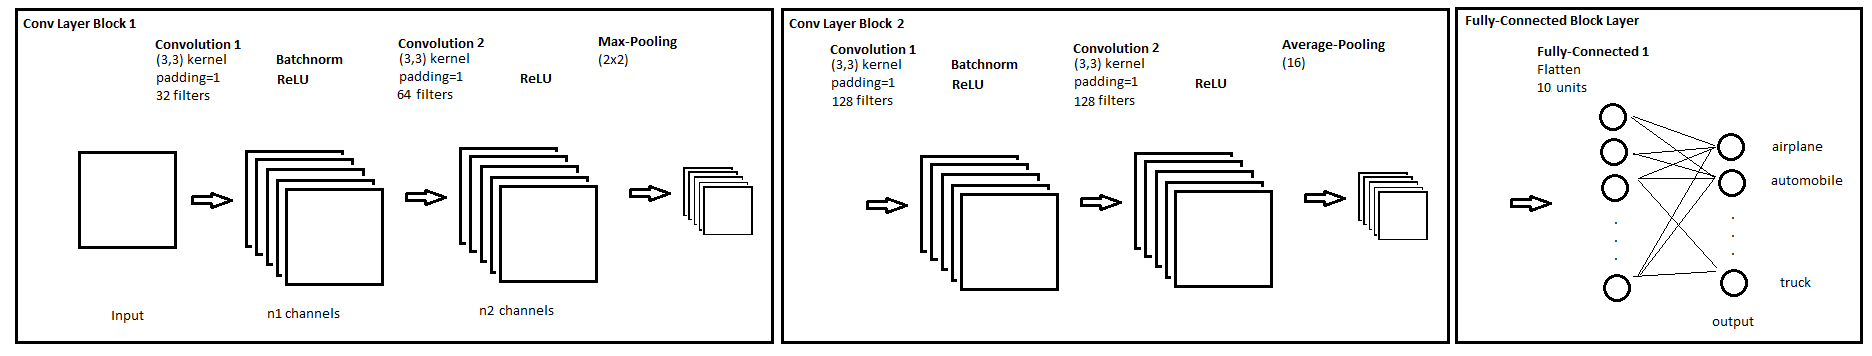

*   Convolutional layer 1: with 32 filters, kernel size of 3*3 and padding 1.
*   Batchnorm and ReLU layers
*   Convolutional layer 2: with 64 filters, kernel size of 3*3 and padding 1.
*   ReLU Activation layer
*   Max pooling with kernel size of 2*2
*   Convolutional layer 3: with 128 filters, kernel size of 3*3 and padding 1.
*   Batchnorm and ReLU layers
*   Convolutional layer 4: with 128 filters, kernel size of 3*3 and padding 1.
*   ReLU Activation layer
*   Average pooling with kernel size 16*16
*   Fully connected layer

#### **Questions**

- Padding is used in the convolutional layers. What does that mean, which variants exist and how does it influence the dimensions of the feature maps?
- What does padding=1 mean in the case of the network displayed above?
- What are the dimensions of the feature maps after the 1. conv layer?
- What are the dimensions of the feature maps after the 2. conv layer?
- What ist the receptive field size after the first two convolutions?
- What is the value for the in_features for the fully-connected layer?
- What is the number of parameters of *Conv Layer block 1*?

**Your answers here**

- Padding means adding extra pixels (usually zeros) around the borders of the input image to controls the size of the feature maps after the convolution. The variants of Padding are:
  * No padding (Valid Convolution): Reduces the dimensions of the feature map.
  * Zero Padding (Same Padding): Ensures the output sieze is same as input size for the stride of 1.
  * Custom Padding: Add specific number of pixels as defined.
    
&nbsp;

- In case of the network displayed above, ```padding=1``` means ading one row/column of zeros around the border of the input or feature map.
  $$
      Output \; Size = \frac{Input \; Size - Kernel \; Size + 2* Padding}{Stride} + 1 = \frac{3 - 3 + 2 * 1} {1} + 1 = 3 = Input \; Size
  $$

  &nbsp;

- Input dimension of the CIFAR-10 image is 32 x 32 x 3. However, first convolution with kernel size: 3 x 3, Stride:1, Padding:1, Filters:32, the output dimension, as calculated above, is given by:
    $$
      Output \; Size = \frac{32-3+2*1} {1} + 1 = 32
  $$
  Thus, feature Map Dimension after 1. conv layer: 32 x 32 x 32.
  
&nbsp;
  
- The input to the layer 2 is 32 x 32 x 32 from the first layer. Now, convolution with kernel size: 3 x 3, Stride:1, Padding:1, Filters:64, the output dimension, as calculated above, is given by:
    $$
      Output \; Size = \frac{32-3+2*1} {1} + 1 = 32
  $$
  Thus, feature Map Dimension after 2. conv layer: 32 x 32 x 64.

  &nbsp;

- Receptive fields refers to the area of the input image that influences a single output value. The receptive field for the first convolution is 3 x 3. Thus, receptive field for the 2nd convolution:
  $$
      Receptive \; Field = Previous \; Receptive \; Field + 2 * (Kernel \; Size - 1) = 3+2*(2-1) = 5
  $$

  &nbsp;
  
- After Max Pooling (with kernel size 2 x 2) on 32 x 32 x 64, the dimension becomes:
  $$
      Output \; Size = \frac{32}{2} = 16
  $$
  After Convolutional Layers 3 and 4, followed by Average Polling (16 x 16), the output size becomes 1 x 1 x 128.

  Thus, the total number of input features to the fully connected layer:
  ```in_features``` = 1 x 1 x 128 = 128.

  &nbsp;
  
- Block 1 cosists of:
  * Convolutional Layer 1 (Block 1): 3 input channels, 32 filters, kernel size 3 * 3.
      $$
      Parameters = (Kernel \; Size * Kernel \; Size * Input \; Channels + Bias) * Number \; of \; filters
  $$
    $$
      Parameters = (3 * 3 * 3 + 1) * 32 = 896$$
  * Convolutional Layer 2 (Block1): 32 input channels, 64 filters, and 3 x 3 kernel size.
      $$Parameters = (3 * 3 * 32 + 1) * 64 = 18432$$
  * Batch Normalization Layer:
    BatchNorm1: 32 features with 2 parameters = 64 (scale and shift for 32 filters)
  * Total parameters for the Block 1: 896 + 18432 + 64 = 19392.

In [16]:
#TODO: Define model 2

class Model2(nn.Module):
    def __init__(self):
        super(Model2, self).__init__()
        # Convolutional Layer 1: 32 filters, kernel size 3x3, padding 1
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)  # Batch Normalization
        self.relu1 = nn.ReLU()

        # Convolutional Layer 2: 64 filters, kernel size 3x3, padding 1
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()

        # Max Pooling Layer
        self.pool1 = nn.MaxPool2d(kernel_size=2)

        # Convolutional Layer 3: 128 filters, kernel size 3x3, padding 1
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)  # Batch Normalization
        self.relu3 = nn.ReLU()

        # Convolutional Layer 4: 128 filters, kernel size 3x3, padding 1
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.relu4 = nn.ReLU()

        # Average Pooling Layer
        self.pool2 = nn.AvgPool2d(kernel_size=16)

        # Fully Connected Layer
        self.fc1 = nn.Linear(128, 10)  # Output 10 classes for CIFAR-10

    def forward(self, x):
        x = self.relu1(self.bn1(self.conv1(x)))  # Conv1 + BatchNorm + ReLU
        x = self.relu2(self.conv2(x))           # Conv2 + ReLU
        x = self.pool1(x)                       # Max Pooling
        x = self.relu3(self.bn3(self.conv3(x))) # Conv3 + BatchNorm + ReLU
        x = self.relu4(self.conv4(x))           # Conv4 + ReLU
        x = self.pool2(x)                       # Average Pooling
        x = x.view(x.size(0), -1)               # Flatten
        x = self.fc1(x)                         # Fully Connected Layer
        return x

# Instantiate the model
model2 = Model2().to(device)

#### **TODO** 

- train the new net (30 epochs, try lr=0.1 or change as necessary), plot the results, and compare the results to the 1-layer CNN
- explain why you observe these results

Epoch 1/60


Train Loss: 6.0179, Train Accuracy: 0.1840
Val Loss: 2.0174, Val Accuracy: 0.2333
Epoch 2/60


Train Loss: 1.9144, Train Accuracy: 0.2783
Val Loss: 1.9454, Val Accuracy: 0.2988
Epoch 3/60


Train Loss: 1.7501, Train Accuracy: 0.3489
Val Loss: 1.8947, Val Accuracy: 0.3295
Epoch 4/60


Train Loss: 1.6419, Train Accuracy: 0.3894
Val Loss: 1.6309, Val Accuracy: 0.3949
Epoch 5/60


Train Loss: 1.5754, Train Accuracy: 0.4142
Val Loss: 2.0926, Val Accuracy: 0.3102
Epoch 6/60


Train Loss: 1.5221, Train Accuracy: 0.4415
Val Loss: 1.5081, Val Accuracy: 0.4409
Epoch 7/60


Train Loss: 1.4091, Train Accuracy: 0.4775
Val Loss: 1.5787, Val Accuracy: 0.4368
Epoch 8/60


Train Loss: 1.3635, Train Accuracy: 0.5018
Val Loss: 1.6571, Val Accuracy: 0.4105
Epoch 9/60


Train Loss: 1.3232, Train Accuracy: 0.5156
Val Loss: 1.5944, Val Accuracy: 0.4456
Epoch 10/60


Train Loss: 1.2754, Train Accuracy: 0.5371
Val Loss: 1.4020, Val Accuracy: 0.4984
Epoch 11/60


Train Loss: 1.2102, Train Accuracy: 0.5644
Val Loss: 1.3502, Val Accuracy: 0.5149
Epoch 12/60


Train Loss: 1.1987, Train Accuracy: 0.5645
Val Loss: 1.3398, Val Accuracy: 0.5128
Epoch 13/60


Train Loss: 1.1379, Train Accuracy: 0.5881
Val Loss: 1.2587, Val Accuracy: 0.5511
Epoch 14/60


Train Loss: 1.1229, Train Accuracy: 0.5977
Val Loss: 1.1902, Val Accuracy: 0.5744
Epoch 15/60


Train Loss: 1.0724, Train Accuracy: 0.6167
Val Loss: 1.3693, Val Accuracy: 0.5284
Epoch 16/60


Train Loss: 1.0701, Train Accuracy: 0.6145
Val Loss: 1.1774, Val Accuracy: 0.5811
Epoch 17/60


Train Loss: 1.0328, Train Accuracy: 0.6292
Val Loss: 1.1672, Val Accuracy: 0.5746
Epoch 18/60


Train Loss: 0.9940, Train Accuracy: 0.6441
Val Loss: 1.3140, Val Accuracy: 0.5511
Epoch 19/60


Train Loss: 1.0096, Train Accuracy: 0.6415
Val Loss: 1.5210, Val Accuracy: 0.5056
Epoch 20/60


Train Loss: 0.9583, Train Accuracy: 0.6557
Val Loss: 1.0123, Val Accuracy: 0.6394
Epoch 21/60


Train Loss: 0.9227, Train Accuracy: 0.6724
Val Loss: 1.2687, Val Accuracy: 0.5794
Epoch 22/60


Train Loss: 0.9316, Train Accuracy: 0.6667
Val Loss: 1.0054, Val Accuracy: 0.6427
Epoch 23/60


Train Loss: 0.8790, Train Accuracy: 0.6844
Val Loss: 2.6187, Val Accuracy: 0.4022
Epoch 24/60


Train Loss: 0.9794, Train Accuracy: 0.6549
Val Loss: 1.0674, Val Accuracy: 0.6322
Epoch 25/60


Train Loss: 0.8760, Train Accuracy: 0.6873
Val Loss: 1.5915, Val Accuracy: 0.5313
Epoch 26/60


Train Loss: 0.8733, Train Accuracy: 0.6918
Val Loss: 1.1833, Val Accuracy: 0.5998
Epoch 27/60


Train Loss: 0.8394, Train Accuracy: 0.7008
Val Loss: 0.9867, Val Accuracy: 0.6529
Epoch 28/60


Train Loss: 0.8182, Train Accuracy: 0.7085
Val Loss: 1.1159, Val Accuracy: 0.6285
Epoch 29/60


Train Loss: 0.8279, Train Accuracy: 0.7060
Val Loss: 1.1680, Val Accuracy: 0.6053
Epoch 30/60


Train Loss: 0.8088, Train Accuracy: 0.7146
Val Loss: 0.9995, Val Accuracy: 0.6426
Epoch 31/60


Train Loss: 0.8037, Train Accuracy: 0.7138
Val Loss: 1.0278, Val Accuracy: 0.6513
Epoch 32/60


Train Loss: 0.8020, Train Accuracy: 0.7138
Val Loss: 1.0150, Val Accuracy: 0.6411
Epoch 33/60


Train Loss: 0.7724, Train Accuracy: 0.7256
Val Loss: 0.9940, Val Accuracy: 0.6552
Epoch 34/60


Train Loss: 0.7637, Train Accuracy: 0.7290
Val Loss: 1.0025, Val Accuracy: 0.6583
Epoch 35/60


Train Loss: 0.7569, Train Accuracy: 0.7317
Val Loss: 1.1205, Val Accuracy: 0.6187
Epoch 36/60


Train Loss: 0.7475, Train Accuracy: 0.7340
Val Loss: 1.0210, Val Accuracy: 0.6498
Epoch 37/60


Train Loss: 0.7537, Train Accuracy: 0.7339
Val Loss: 1.0802, Val Accuracy: 0.6517
Epoch 38/60


Train Loss: 0.7383, Train Accuracy: 0.7392
Val Loss: 0.9892, Val Accuracy: 0.6576
Epoch 39/60


Train Loss: 0.7343, Train Accuracy: 0.7421
Val Loss: 1.1450, Val Accuracy: 0.6140
Epoch 40/60


Train Loss: 0.7233, Train Accuracy: 0.7428
Val Loss: 0.9469, Val Accuracy: 0.6812
Epoch 41/60


Train Loss: 0.7059, Train Accuracy: 0.7468
Val Loss: 0.9799, Val Accuracy: 0.6630
Epoch 42/60


Train Loss: 0.6894, Train Accuracy: 0.7529
Val Loss: 1.0473, Val Accuracy: 0.6535
Epoch 43/60


Train Loss: 0.6947, Train Accuracy: 0.7520
Val Loss: 0.9403, Val Accuracy: 0.6818
Epoch 44/60


Train Loss: 0.6510, Train Accuracy: 0.7678
Val Loss: 1.1194, Val Accuracy: 0.6395
Epoch 45/60


Train Loss: 0.6575, Train Accuracy: 0.7662
Val Loss: 1.0261, Val Accuracy: 0.6631
Epoch 46/60


Train Loss: 0.6679, Train Accuracy: 0.7635
Val Loss: 1.0529, Val Accuracy: 0.6628
Epoch 47/60


Train Loss: 0.6500, Train Accuracy: 0.7682
Val Loss: 1.0170, Val Accuracy: 0.6722
Epoch 48/60


Train Loss: 0.6786, Train Accuracy: 0.7562
Val Loss: 1.2395, Val Accuracy: 0.6029
Epoch 49/60


Train Loss: 0.6481, Train Accuracy: 0.7729
Val Loss: 0.9622, Val Accuracy: 0.6774
Epoch 50/60


Train Loss: 0.6371, Train Accuracy: 0.7735
Val Loss: 1.0052, Val Accuracy: 0.6824
Epoch 51/60


Train Loss: 0.6130, Train Accuracy: 0.7844
Val Loss: 0.9857, Val Accuracy: 0.6754
Epoch 52/60


Train Loss: 0.6064, Train Accuracy: 0.7854
Val Loss: 0.9445, Val Accuracy: 0.6889
Epoch 53/60


Train Loss: 0.6061, Train Accuracy: 0.7866
Val Loss: 1.0501, Val Accuracy: 0.6593
Epoch 54/60


Train Loss: 0.5984, Train Accuracy: 0.7913
Val Loss: 1.5691, Val Accuracy: 0.5696
Epoch 55/60


Train Loss: 0.6483, Train Accuracy: 0.7708
Val Loss: 1.0887, Val Accuracy: 0.6624
Epoch 56/60


Train Loss: 0.5789, Train Accuracy: 0.7955
Val Loss: 1.0269, Val Accuracy: 0.6690
Epoch 57/60


Train Loss: 0.5741, Train Accuracy: 0.7980
Val Loss: 1.1548, Val Accuracy: 0.6592
Epoch 58/60


Train Loss: 0.5860, Train Accuracy: 0.7913
Val Loss: 1.1120, Val Accuracy: 0.6625
Epoch 59/60


Train Loss: 0.5708, Train Accuracy: 0.7946
Val Loss: 1.0601, Val Accuracy: 0.6673
Epoch 60/60


Train Loss: 0.5515, Train Accuracy: 0.8047
Val Loss: 1.4872, Val Accuracy: 0.6006


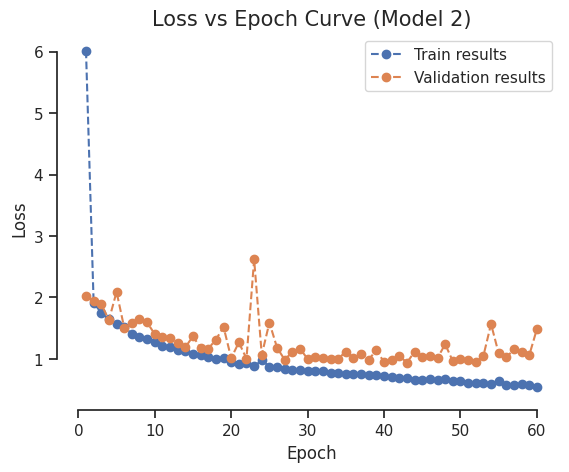

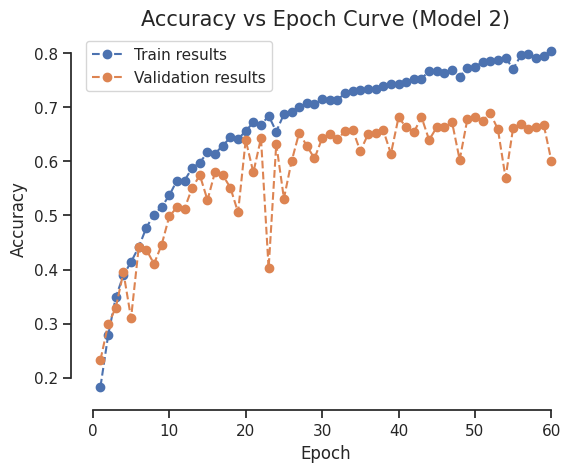

In [17]:
# TODO: Train and plot

# Initialize optimizer and loss function
optimizer = optim.Adam(model2.parameters(), lr=0.1)
loss_function = nn.CrossEntropyLoss()

# Lists to store results
train_losses, val_losses, train_accs, val_accs = [], [], [], []

# Train the model
num_epochs = 60
for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    
    # Train for one epoch
    train_loss, train_acc = train(trainloader, optimizer, model2, loss_function, device, master_bar=None)
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    
    # Validate after each epoch
    val_loss, val_acc, _ = validate(valloader, model2, loss_function, device, master_bar=None)
    val_losses.append(val_loss)
    val_accs.append(val_acc)

    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}")
    print(f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.4f}")

# Plotting the results
plot(
    title="Loss vs Epoch Curve (Model 2)",
    label="Loss",
    train_results=train_losses,
    val_results=val_losses
)

plot(
    title="Accuracy vs Epoch Curve (Model 2)",
    label="Accuracy",
    train_results=train_accs,
    val_results=val_accs
)

#### Answer:
Comparing these plots with the model_1 (with single convolutional layer), we can see that the model does not necessarily overfit due to:
- More convolutional layers captures complex patterns and hierarchical features.
- Batch Normalization normalizes the inputs to each layer reducing the effect of weight normalization, and alllowing the network to learn faster. 

However, the fluctuations in the validation performance suggest potential overfitting in later epochs or insufficient regularization.

## 5. ResNet architecture

"*Deeper neural networks are more difficult to train.  We present a residual learning framework to ease the training of networks that are substantially deeper than those used previously.*" [ https://arxiv.org/pdf/1512.03385.pdf]

That was the intention of He et al. to develop residual networks.

A ResNet is built of blocks which are called the *Residual Blocks*. 
A residual block uses *skip connections* - shortCuts — to jump over some layers to skip some activations.
The Resnet skips connections via addition.

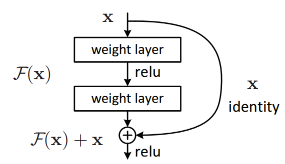

#### **Questions**
- Which problems do using skip connections solve?
- Why is a residual network called residual? 

**Your answers here**

- In very deep networks, gradients during backpropagation can become very small (vanishing gradient) or very large (exploding gradient), making it difficult to optimize the model. Skip connections allow the gradient to flow directly through the network without passing through multiple non-linear layers. This helps prevent the vanishing/exploding gradient issue.

&nbsp;

- Residual Network is called residual because it learns residual functions rather than directly learning the full mapping. The network essentially "residualizes" the problem, foucing on the part of the transformation that deviates from the identitiy mapping (as shown in above figure). 

#### **TODO**
- write a class **ResidualBlock(nn.Module)** where you define the blocks used in the ResNet
- write a class **ResNet(nn.Module)** where you define the model
- Train the model and plot results
- Train another model by disable residual connections and compare performance

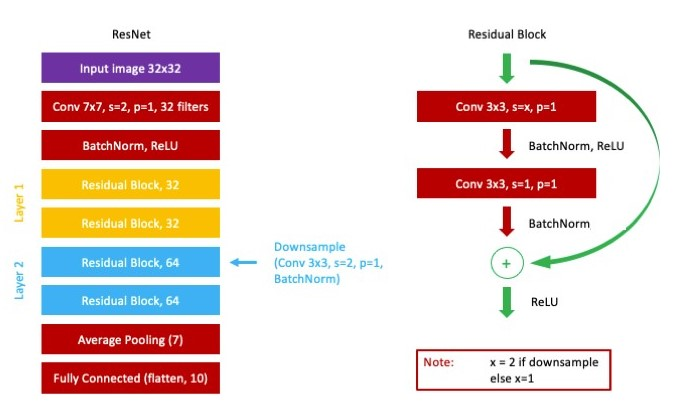

**Hints**

- The downsampling in this ResNet happens between layer 1 and layer 2. In this step, the channel size is increased (32 -> 64) and the image resolution is downsampled by strided convolution (stride=2 in the Conv2d layers).
- For the adding part, the dimensions obviously have to be the same. This is accomplished by using stride=2 in the first Conv2d layer of the block while the second layer does not change the dimensions.
- The average-pooling layer has kernel size 7.
- For you to ensure everything works fine, here are the shapes in the form [(batchsize), x, y, channel] where I discard batchsize, because it does not change.
32x32x3 -> conv 7x7 -> 14x14x32 -> layer 1 -> 14x14x32 -> layer2 -> 7x7x64 -> avpool(7) -> 1x1x64 -> linear(64, 10)

In [18]:
# TODO: Write a class ResidualBlock(nn.Module) where you define the blocks used in the ResNet

#Rasidual Block implementation

#This block accounts for downsampling using stride=2 when transitioning from one layer to 
#next and maintains dimension consistency for addition. 
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)

        # Shortcut connection for downsampling
        self.downsample = None
        if stride != 1 or in_channels != out_channels:
            self.downsample = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        identity = x
        if self.downsample:
            identity = self.downsample(x)
        
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        
        out = self.conv2(out)
        out = self.bn2(out)
        
        out += identity
        out = self.relu(out)
        return out

In [19]:
# TODO: Write a class ResNet(nn.Module) where you define the model

#Resnet Model Implementation

#This model ensures correct transitions between layers, matching dimensions for addition, 
# and final global average polling. 
class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=10):
        super(ResNet, self).__init__()
        self.in_channels = 32
        
        # Initial convolutional layer
        self.conv1 = nn.Conv2d(3, 32, kernel_size=7, stride=2, padding=3)  # 32x32x3 -> 16x16x32
        self.bn1 = nn.BatchNorm2d(32)
        self.relu = nn.ReLU()

        # Layer 1: 32 filters
        self.layer1 = self.make_layer(block, 32, layers[0], stride=1)  # No downsampling

        # Layer 2: 64 filters, with downsampling
        self.layer2 = self.make_layer(block, 64, layers[1], stride=2)  # Downsample

        # Average pooling
        self.avg_pool = nn.AvgPool2d(kernel_size=7)  # 7x7 -> 1x1

        # Fully connected layer
        self.fc = nn.Linear(64, num_classes)

    def make_layer(self, block, out_channels, blocks, stride):
        layers = []
        layers.append(block(self.in_channels, out_channels, stride))
        self.in_channels = out_channels
        for _ in range(1, blocks):
            layers.append(block(out_channels, out_channels))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)

        x = self.layer1(x)
        x = self.layer2(x)

        x = self.avg_pool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

# Instantiate the ResNet model
model_with_residual = ResNet(ResidualBlock, [2, 2]).to(device)  
        

In [21]:
# TODO: Train ResNet using the architecture laid out in the comments and figures above. Plot loss and accuracy for training and validation set.

#Train Model with Rasdial Connections

# Initialize optimizer and loss function
optimizer_with_residual = optim.Adam(model_with_residual.parameters(), lr=0.001)
loss_function = nn.CrossEntropyLoss()

# Training pipeline
def train_and_validate(model, optimizer, num_epochs):
    train_losses, val_losses, train_accs, val_accs = [], [], [], []
    for epoch in range(num_epochs):
        train_loss, train_acc = train(trainloader, optimizer, model, loss_function, device, master_bar=None)
        val_loss, val_acc, _ = validate(valloader, model, loss_function, device, master_bar=None)
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        val_losses.append(val_loss)
        val_accs.append(val_acc)
    return train_losses, val_losses, train_accs, val_accs

# Train with rasidual models
epochs = 30
residual_results = train_and_validate(model_with_residual, optimizer_with_residual, epochs)

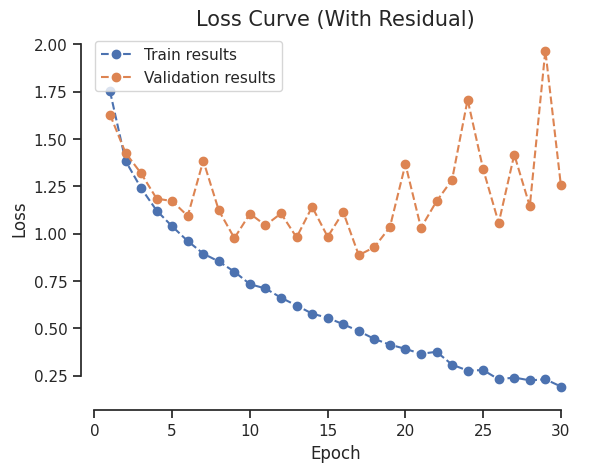

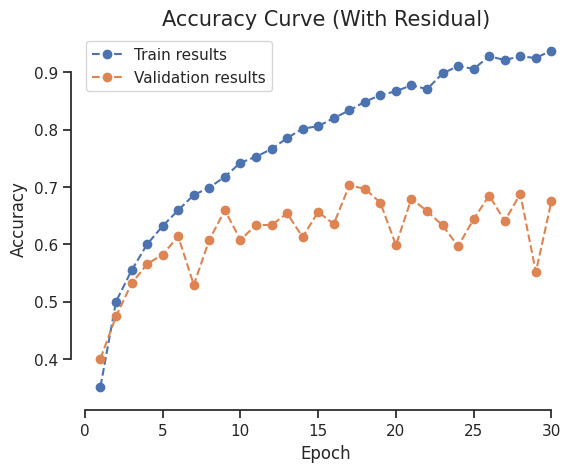

In [22]:
# Plot results
plot("Loss Curve (With Residual)", "Loss", residual_results[0], residual_results[1])
plot("Accuracy Curve (With Residual)", "Accuracy", residual_results[2], residual_results[3])

In [26]:
# TODO: Train another model by disabling all residual connections. Plot loss and accuracy curves for training and validation set.

#To disable residual connections, modify the ResidualBlock to removce the addition operation. 

class NonResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(NonResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)

    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)
        return out

# Define the ResNet model without residual connections
model_without_residual = ResNet(NonResidualBlock, [2, 2]).to(device)

In [27]:
# Initialize optimizer and loss function
optimizer_without_residual = optim.Adam(model_without_residual.parameters(), lr=0.001)
loss_function = nn.CrossEntropyLoss()

# Training pipeline
def train_and_validate(model, optimizer, num_epochs):
    train_losses, val_losses, train_accs, val_accs = [], [], [], []
    for epoch in range(num_epochs):
        train_loss, train_acc = train(trainloader, optimizer, model, loss_function, device, master_bar=None)
        val_loss, val_acc, _ = validate(valloader, model, loss_function, device, master_bar=None)
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        val_losses.append(val_loss)
        val_accs.append(val_acc)
    return train_losses, val_losses, train_accs, val_accs

# Train model
epochs = 30
non_residual_results = train_and_validate(model_without_residual, optimizer_without_residual, epochs)


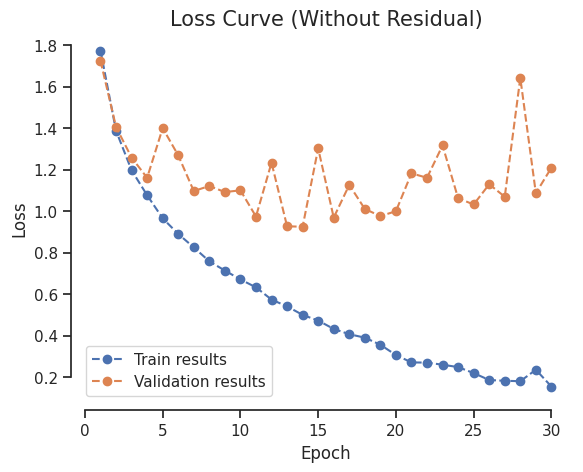

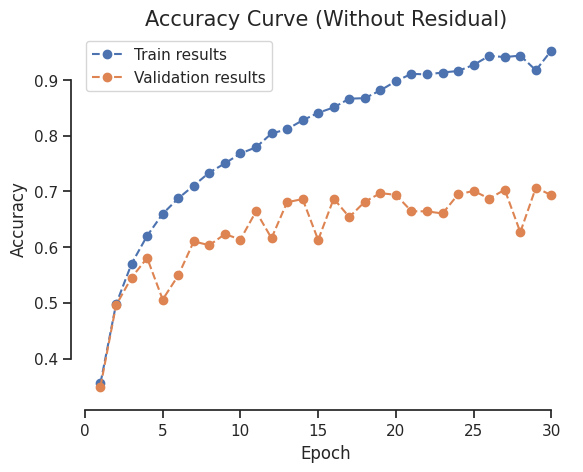

In [31]:

plot("Loss Curve (Without Residual)", "Loss", non_residual_results[0], non_residual_results[1])
plot("Accuracy Curve (Without Residual)", "Accuracy", non_residual_results[2], non_residual_results[3])

#### **Questions**
- Does using residual connections result in better performance in this exercise? If yes, why? If not, when would the benefit of using ResNet be most visible?
- In deeper networks, how would you expect residual blocks to influence training time? why?
- Compare the performance and training time of your ResNet with the CNNs you trained in the previous section.

**Your answers here**

- In this specific exercise, using residual connections does not significantly improve performance becuase of the shallow network depth and smaller task complexity with CIFAR-10 dataset. However, when training very deep networks (e.g. more than 30 layers) or more complex datasets (e.g. ImageNet), the benefit of using ResNet become most visible.

  &nbsp;

- Residual blocks may slightly increase per-epoch training time due to additional computations for the skip connections (e.g. element-wise addition). However they significantly reduce the total training time because they make the optimizatio process mroe stable and efficient by focusing on residuals rather then entire mapping.Thus, ResNet converges faster.

&nbsp;

- The performance and trainig time of ResNet did not outperform previously trained CNNs because the networks were shallow and the dataset was relatively small. 

## 6. Explore Learning Rate Scheduling

Learning rate scheduling is a mechanism to adjust the learning rate.

*`torch.optim.lr_scheduler`* provides several methods based on the number of epochs. Learning rate scheduling should be applied after optimizer’s update.

#### **TODO**
- change run_training and extend to use scheduler for learning rate
- use `StepLR` (https://pytorch.org/docs/stable/optim.html), use the ResNet, train for 10 epochs. Start with a learning rate of 0.1.


#### **Questions**

- Try step size 1, gamma 0.1
    - How does it change the learning rate?
    - what do you observe regarding performance?
- Try step size 1, gamma 0.9, what do you observe?
    - How does it change the learning rate?
    - what do you observe regarding performance?
- What can you conclude of this experiment regarding the synergy of step size and gamma to get a good schedule?

**Your Answer Here**

- For the Step size=1 and Gamma=0.1, the learning rate decreases by a factor of 0.1 every epoch such as 0.1, 0.01, 0.001, and so on. Rapid learning rate decay results in convergence to a suboptimal point, where the model is unalbe to continue improving after just a few epochs.

  &nbsp;

- For the step size=1 and Gamma=0.9, the learning rate decreases more gradually, by a factor of 0.9 every epoch. Example: 0.1 * 0.9 = 0.09, and so on (0.09 * 0.9 = 0.081). Grdual learning rate decay allows the model to continue learning effectively over all epochs, leading to a better performance and smoother convergence.

  &nbsp;

- The best configuration in this experiment to get a good schedule, the step size is 1 for Gamma 0.9. It produced the most stable and effective performance, as it allowed the learning rate to decay gradually, enabling the model to continue learning over all epochs. 

In [36]:
# TODO: Change run_training (you can copy the code from setup.py here and create a new method here 
# or just change/create a new method it in the python file)

#Modify run_training to use StepLR
def run_training_with_scheduler(model, optimizer, scheduler, loss_function, device, num_epochs, 
                                train_dataloader, val_dataloader, verbose=False):
    """Run model training with learning rate scheduler.

    Args:
        model (nn.Module): Torch model to train
        optimizer: Torch optimizer object
        scheduler: Learning rate scheduler
        loss_function: Torch loss function
        device (torch.device): Device to train the model on
        num_epochs (int): Number of epochs
        train_dataloader (DataLoader): Training data loader
        val_dataloader (DataLoader): Validation data loader
        verbose (bool): Print training progress

    Returns:
        train_losses, val_losses, train_accs, val_accs
    """
    train_losses, val_losses, train_accs, val_accs = [], [], [], []

    for epoch in range(num_epochs):
        # Train
        model.train()
        epoch_train_loss, epoch_train_acc = train(train_dataloader, optimizer, model, loss_function, device, master_bar=None)

        # Validate
        model.eval()
        epoch_val_loss, epoch_val_acc, _ = validate(val_dataloader, model, loss_function, device, master_bar=None)

        # Step the scheduler
        scheduler.step()

        # Save metrics
        train_losses.append(epoch_train_loss)
        val_losses.append(epoch_val_loss)
        train_accs.append(epoch_train_acc)
        val_accs.append(epoch_val_acc)

        if verbose:
            print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_acc:.4f}, "
                  f"Val Loss: {epoch_val_loss:.4f}, Val Acc: {epoch_val_acc:.4f}, LR: {scheduler.get_last_lr()[0]:.6f}")

    return train_losses, val_losses, train_accs, val_accs

Epoch 1/10, Train Loss: 1.7707, Train Acc: 0.3322, Val Loss: 1.6440, Val Acc: 0.3873, LR: 0.010000


Epoch 2/10, Train Loss: 1.4545, Train Acc: 0.4611, Val Loss: 1.4655, Val Acc: 0.4627, LR: 0.001000


Epoch 3/10, Train Loss: 1.3878, Train Acc: 0.4894, Val Loss: 1.3870, Val Acc: 0.4906, LR: 0.000100


Epoch 4/10, Train Loss: 1.3838, Train Acc: 0.4947, Val Loss: 1.3844, Val Acc: 0.4924, LR: 0.000010


Epoch 5/10, Train Loss: 1.3776, Train Acc: 0.4950, Val Loss: 1.3848, Val Acc: 0.4926, LR: 0.000001


Epoch 6/10, Train Loss: 1.3802, Train Acc: 0.4955, Val Loss: 1.3853, Val Acc: 0.4918, LR: 0.000000


Epoch 7/10, Train Loss: 1.3781, Train Acc: 0.4943, Val Loss: 1.3854, Val Acc: 0.4924, LR: 0.000000


Epoch 8/10, Train Loss: 1.3805, Train Acc: 0.4944, Val Loss: 1.3840, Val Acc: 0.4915, LR: 0.000000


Epoch 9/10, Train Loss: 1.3781, Train Acc: 0.4950, Val Loss: 1.3841, Val Acc: 0.4928, LR: 0.000000


Epoch 10/10, Train Loss: 1.3836, Train Acc: 0.4948, Val Loss: 1.3842, Val Acc: 0.4911, LR: 0.000000


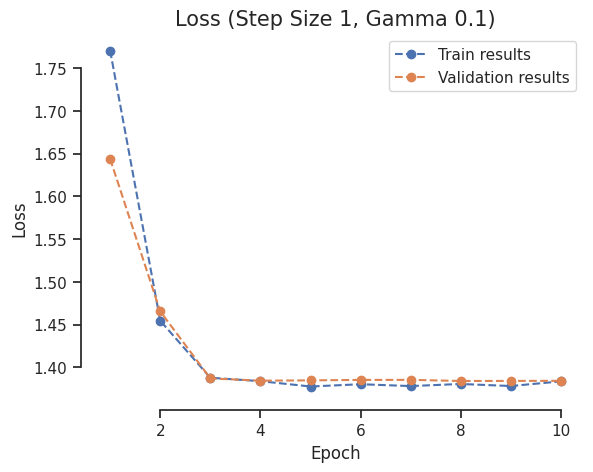

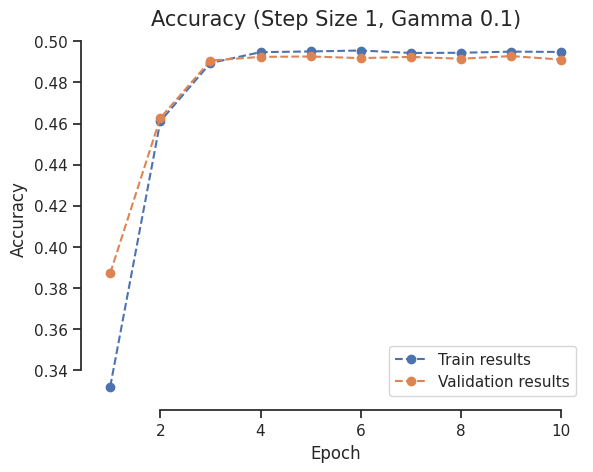

In [33]:
# TODO: Train and plot with step size 1, gamma 0.1

#Train with StepLR Scheduler
#Train for 10 Epochs (Step Size = 1, Gamma = 0.1)
# Initialize model, optimizer, and scheduler
model = ResNet(ResidualBlock, [2, 2]).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.1)

# Train for 10 epochs
train_losses_1, val_losses_1, train_accs_1, val_accs_1 = run_training_with_scheduler(
    model, optimizer, scheduler, loss_function, device, 10, trainloader, valloader, verbose=True
)

# Plot results
plot("Loss (Step Size 1, Gamma 0.1)", "Loss", train_losses_1, val_losses_1)
plot("Accuracy (Step Size 1, Gamma 0.1)", "Accuracy", train_accs_1, val_accs_1)

Epoch 1/10, Train Loss: 1.7492, Train Acc: 0.3423, Val Loss: 1.9327, Val Acc: 0.3140, LR: 0.090000


Epoch 2/10, Train Loss: 1.4347, Train Acc: 0.4729, Val Loss: 1.3970, Val Acc: 0.4731, LR: 0.081000


Epoch 3/10, Train Loss: 1.2451, Train Acc: 0.5480, Val Loss: 1.3705, Val Acc: 0.5087, LR: 0.072900


Epoch 4/10, Train Loss: 1.1075, Train Acc: 0.5997, Val Loss: 1.2881, Val Acc: 0.5410, LR: 0.065610


Epoch 5/10, Train Loss: 1.0003, Train Acc: 0.6413, Val Loss: 1.2649, Val Acc: 0.5598, LR: 0.059049


Epoch 6/10, Train Loss: 0.9232, Train Acc: 0.6727, Val Loss: 1.2254, Val Acc: 0.5826, LR: 0.053144


Epoch 7/10, Train Loss: 0.8260, Train Acc: 0.7065, Val Loss: 1.3488, Val Acc: 0.5508, LR: 0.047830


Epoch 8/10, Train Loss: 0.7796, Train Acc: 0.7221, Val Loss: 0.9617, Val Acc: 0.6592, LR: 0.043047


Epoch 9/10, Train Loss: 0.7243, Train Acc: 0.7448, Val Loss: 0.9290, Val Acc: 0.6793, LR: 0.038742


Epoch 10/10, Train Loss: 0.6605, Train Acc: 0.7694, Val Loss: 0.9902, Val Acc: 0.6660, LR: 0.034868


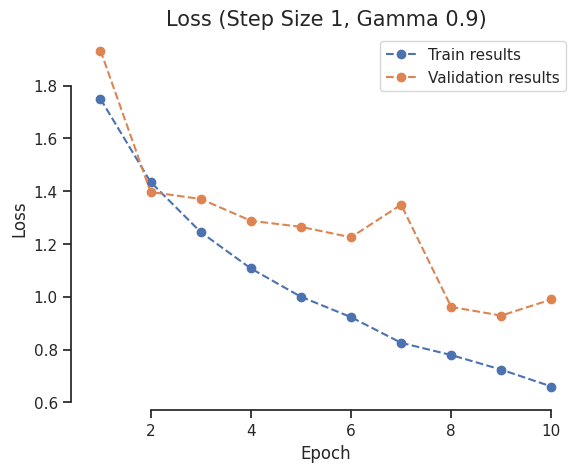

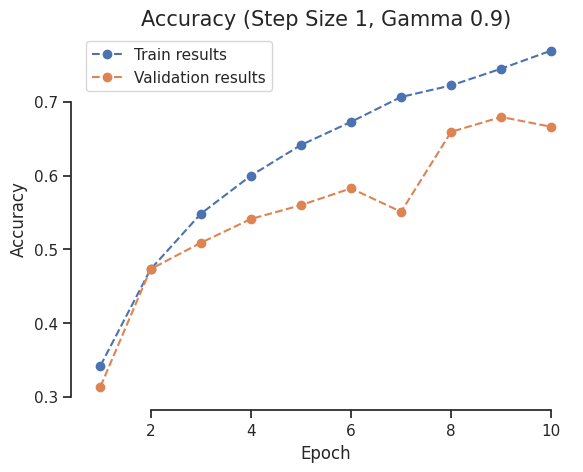

In [34]:
# TODO: Train and plot with step size 1, gamma 0.9
# Initialize model, optimizer, and scheduler
model = ResNet(ResidualBlock, [2, 2]).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.9)

# Train for 10 epochs
train_losses_2, val_losses_2, train_accs_2, val_accs_2 = run_training_with_scheduler(
    model, optimizer, scheduler, loss_function, device, 10, trainloader, valloader, verbose=True
)

# Plot results
plot("Loss (Step Size 1, Gamma 0.9)", "Loss", train_losses_2, val_losses_2)
plot("Accuracy (Step Size 1, Gamma 0.9)", "Accuracy", train_accs_2, val_accs_2)

#### **TODO** 

Use step size 15, gamma 0.1. Train for 30 epochs.

Epoch 1/30, Train Loss: 1.7970, Train Acc: 0.3302, Val Loss: 1.8796, Val Acc: 0.3399, LR: 0.100000


Epoch 2/30, Train Loss: 1.4960, Train Acc: 0.4471, Val Loss: 1.6878, Val Acc: 0.3980, LR: 0.100000


Epoch 3/30, Train Loss: 1.3574, Train Acc: 0.5023, Val Loss: 1.7035, Val Acc: 0.4286, LR: 0.100000


Epoch 4/30, Train Loss: 1.2199, Train Acc: 0.5584, Val Loss: 2.1335, Val Acc: 0.3842, LR: 0.100000


Epoch 5/30, Train Loss: 1.1096, Train Acc: 0.6002, Val Loss: 1.1776, Val Acc: 0.5723, LR: 0.100000


Epoch 6/30, Train Loss: 1.0009, Train Acc: 0.6447, Val Loss: 1.3178, Val Acc: 0.5424, LR: 0.100000


Epoch 7/30, Train Loss: 0.9254, Train Acc: 0.6707, Val Loss: 1.6189, Val Acc: 0.4713, LR: 0.100000


Epoch 8/30, Train Loss: 0.8551, Train Acc: 0.6985, Val Loss: 1.0767, Val Acc: 0.6281, LR: 0.100000


Epoch 9/30, Train Loss: 0.7837, Train Acc: 0.7202, Val Loss: 1.2409, Val Acc: 0.5715, LR: 0.100000


Epoch 10/30, Train Loss: 0.7266, Train Acc: 0.7426, Val Loss: 0.9421, Val Acc: 0.6739, LR: 0.100000


Epoch 11/30, Train Loss: 0.6557, Train Acc: 0.7703, Val Loss: 1.1083, Val Acc: 0.6336, LR: 0.100000


Epoch 12/30, Train Loss: 0.6194, Train Acc: 0.7840, Val Loss: 1.1839, Val Acc: 0.6225, LR: 0.100000


Epoch 13/30, Train Loss: 0.5602, Train Acc: 0.8037, Val Loss: 0.9687, Val Acc: 0.6918, LR: 0.100000


Epoch 14/30, Train Loss: 0.5289, Train Acc: 0.8162, Val Loss: 1.1939, Val Acc: 0.6347, LR: 0.100000


Epoch 15/30, Train Loss: 0.4791, Train Acc: 0.8288, Val Loss: 0.9205, Val Acc: 0.7033, LR: 0.010000


Epoch 16/30, Train Loss: 0.3523, Train Acc: 0.8854, Val Loss: 0.6747, Val Acc: 0.7675, LR: 0.010000


Epoch 17/30, Train Loss: 0.3007, Train Acc: 0.9066, Val Loss: 0.6636, Val Acc: 0.7760, LR: 0.010000


Epoch 18/30, Train Loss: 0.2823, Train Acc: 0.9135, Val Loss: 0.6721, Val Acc: 0.7742, LR: 0.010000


Epoch 19/30, Train Loss: 0.2662, Train Acc: 0.9172, Val Loss: 0.6767, Val Acc: 0.7737, LR: 0.010000


Epoch 20/30, Train Loss: 0.2560, Train Acc: 0.9231, Val Loss: 0.6886, Val Acc: 0.7748, LR: 0.010000


Epoch 21/30, Train Loss: 0.2461, Train Acc: 0.9273, Val Loss: 0.6981, Val Acc: 0.7722, LR: 0.010000


Epoch 22/30, Train Loss: 0.2361, Train Acc: 0.9307, Val Loss: 0.7009, Val Acc: 0.7717, LR: 0.010000


Epoch 23/30, Train Loss: 0.2266, Train Acc: 0.9344, Val Loss: 0.7313, Val Acc: 0.7656, LR: 0.010000


Epoch 24/30, Train Loss: 0.2161, Train Acc: 0.9368, Val Loss: 0.7142, Val Acc: 0.7746, LR: 0.010000


Epoch 25/30, Train Loss: 0.2051, Train Acc: 0.9413, Val Loss: 0.7172, Val Acc: 0.7712, LR: 0.010000


Epoch 26/30, Train Loss: 0.1930, Train Acc: 0.9459, Val Loss: 0.7353, Val Acc: 0.7689, LR: 0.010000


Epoch 27/30, Train Loss: 0.1826, Train Acc: 0.9509, Val Loss: 0.7398, Val Acc: 0.7665, LR: 0.010000


Epoch 28/30, Train Loss: 0.1758, Train Acc: 0.9532, Val Loss: 0.7431, Val Acc: 0.7705, LR: 0.010000


Epoch 29/30, Train Loss: 0.1662, Train Acc: 0.9572, Val Loss: 0.7612, Val Acc: 0.7641, LR: 0.010000


Epoch 30/30, Train Loss: 0.1567, Train Acc: 0.9606, Val Loss: 0.7699, Val Acc: 0.7686, LR: 0.001000


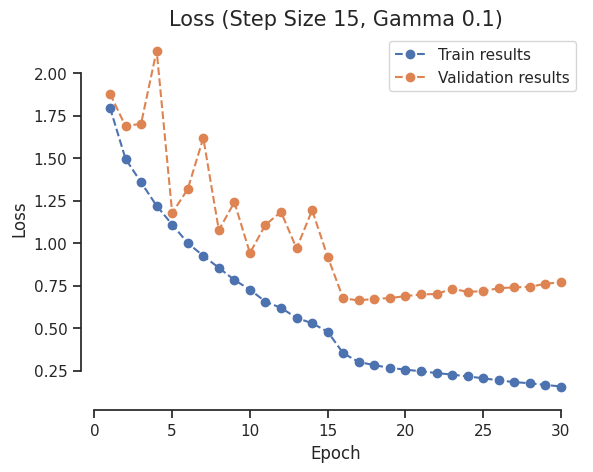

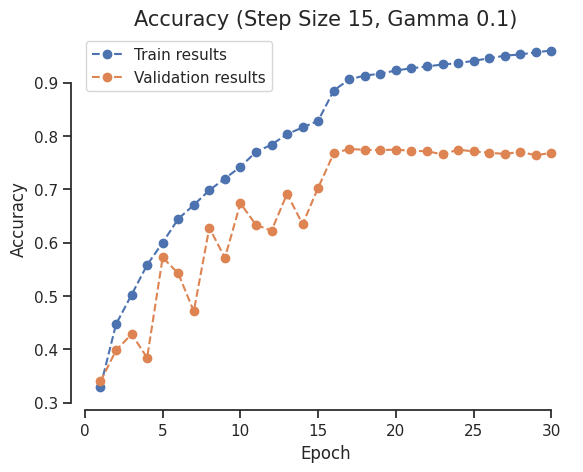

In [35]:
# TODO: Train and plot with step size 15, gamma 0.1, 30 epochs.
# Initialize model, optimizer, and scheduler
model = ResNet(ResidualBlock, [2, 2]).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1)

# Train for 30 epochs

train_losses_3, val_losses_3, train_accs_3, val_accs_3 = run_training_with_scheduler(
    model, optimizer, scheduler, loss_function, device, 30, trainloader, valloader, verbose=True
)

# Plot results
plot("Loss (Step Size 15, Gamma 0.1)", "Loss", train_losses_3, val_losses_3)
plot("Accuracy (Step Size 15, Gamma 0.1)", "Accuracy", train_accs_3, val_accs_3)

#### **Questions**
- Does it improve performance?
- What can you observe in the plots?

**Your answers here**
- It has a slight improvement compared to the previous configuration with smaller step sizes and rapid Gamma decay. The larger step size allow the modle to continue learning for a longer duration.

&nbsp;

- The larger step size (15) allow the model to use a higher learning rate for the first 15 epochs, helping it explore the loss landscape effectively before decaying the learning rate. After the step size, learning rate drops (due to Gamma decay at epoch 15), the model focuses on fine-tuning, which reduces fluctuations.

## 7. LR-Scheduling _(Optional)_

#### TODO _(Optional)_
- try two more scheduler: ExponentialLR and ReduceLROnPlateau 
- vary the parameters, which work best?
- does it improve performance compared to no scheduler?
- does it improve performance compared to StepLR?

In [ ]:
# TODO (Optional): Train and plot with different schedulers

**Your answers here**